<a href="https://colab.research.google.com/github/adaycastro/bluesky-posts/blob/main/Caracterizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Caracterización**

Cargamos el dataset limpio y con posts en inglés

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df.csv to df.csv


In [ ]:
import pandas as pd

df = pd.read_csv('df.csv')

df.head(10)

# **1. Número de caracteres de cada texto**

In [ ]:
df['characters'] = df['text'].apply(lambda x: len(x) if x else 0)
df.head(10)

,text,author,has_images,reply_to,idioma,characters
0,yo,jarivi.bsky.social,False,NaN,en,2
1,:(,pawlos.bsky.social,False,at://did:plc:uh3qfh2gozpm3twcoc7gammd/app.bsky...,en,2
2,test,val9000.bsky.social,False,NaN,en,4
3,I posted this 100 years ago!,justanotherenemy.com,False,NaN,en,28
4,Nope,val9000.bsky.social,False,NaN,en,4
5,OH SHIT!!,val9000.bsky.social,False,NaN,en,9
6,lmfao I can't believe this works,val9000.bsky.social,False,NaN,en,32
7,Well... kinda works,val9000.bsky.social,False,at://did:plc:wgmc6qawor67h4tguhzph7gs/app.bsky...,en,19
8,I had to beat an old lady with a stick to get ...,shiboinu.bsky.social,True,NaN,en,66
9,I had to beat an old lady with a stick to get ...,eramdam.bsky.social,True,NaN,en,66


Medidas de centralización del número de caracteres

In [ ]:
# Media
media = df['characters'].mean()

# Mediana
mediana = df['characters'].median()

# Moda
moda = df['characters'].mode()

print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda.values}")

Media: 111.63471681297081
Mediana: 95.0
Moda: [140]


Histograma del número de caracteres


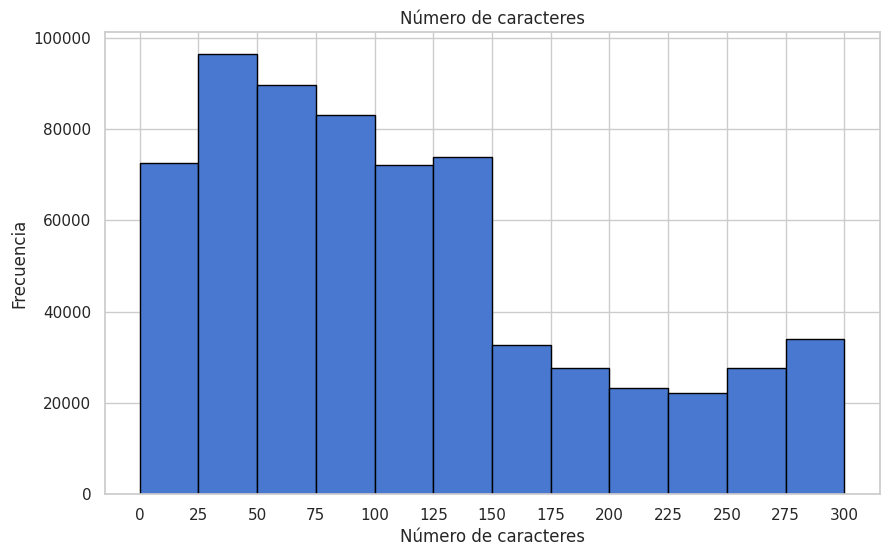

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Rangos en pasos de 25 (de 0 a 300)
x_ticks = np.arange(0, 301, 25)

# Crear histograma
plt.figure(figsize=(10, 6))
plt.hist(df['characters'], bins=np.arange(0, 301, 25), edgecolor='black')

# Personalizar el eje X
plt.xticks(x_ticks)

# Etiquetas y título
plt.title('Número de caracteres')
plt.xlabel('Número de caracteres')
plt.ylabel('Frecuencia')

plt.show()

# 2. Número de tokens

In [ ]:
df['tokens'] = df['text'].apply(lambda x: len(str(x).split()) if x else 0)
df.head(10)

,text,author,has_images,reply_to,idioma,characters,tokens
0,yo,jarivi.bsky.social,False,NaN,en,2,1
1,:(,pawlos.bsky.social,False,at://did:plc:uh3qfh2gozpm3twcoc7gammd/app.bsky...,en,2,1
2,test,val9000.bsky.social,False,NaN,en,4,1
3,I posted this 100 years ago!,justanotherenemy.com,False,NaN,en,28,6
4,Nope,val9000.bsky.social,False,NaN,en,4,1
5,OH SHIT!!,val9000.bsky.social,False,NaN,en,9,2
6,lmfao I can't believe this works,val9000.bsky.social,False,NaN,en,32,6
7,Well... kinda works,val9000.bsky.social,False,at://did:plc:wgmc6qawor67h4tguhzph7gs/app.bsky...,en,19,3
8,I had to beat an old lady with a stick to get ...,shiboinu.bsky.social,True,NaN,en,66,15
9,I had to beat an old lady with a stick to get ...,eramdam.bsky.social,True,NaN,en,66,15


Medidas de centralización del número de tokens


In [ ]:
# Media
media = df['tokens'].mean()

# Mediana
mediana = df['tokens'].median()

# Moda
moda = df['tokens'].mode()

print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda.values}")


Media: 17.70011873222069
Mediana: 14.0
Moda: [1]


In [ ]:
# Valor máximo y mínimo de la columna 'characters'
max_value = df['tokens'].max()
min_value = df['tokens'].min()

print(f'Valor máximo: {max_value}')
print(f'Valor mínimo: {min_value}')

Valor máximo: 144
Valor mínimo: 1


In [ ]:
df_valor_máximo = df[df['tokens'] == 144]

print(df_valor_máximo)

                                                     text             author  \
569276  .\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n....  snglb.bsky.social   
569277  .\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n....  snglb.bsky.social   

        has_images                                           reply_to idioma  \
569276       False  at://did:plc:ebhbuxhdgxojl6bmedmtwgfh/app.bsky...     en   
569277       False  at://did:plc:ebhbuxhdgxojl6bmedmtwgfh/app.bsky...     en   

        characters  tokens  
569276         287     144  
569277         287     144  


Representación gráfica de la frecuencia de tokens

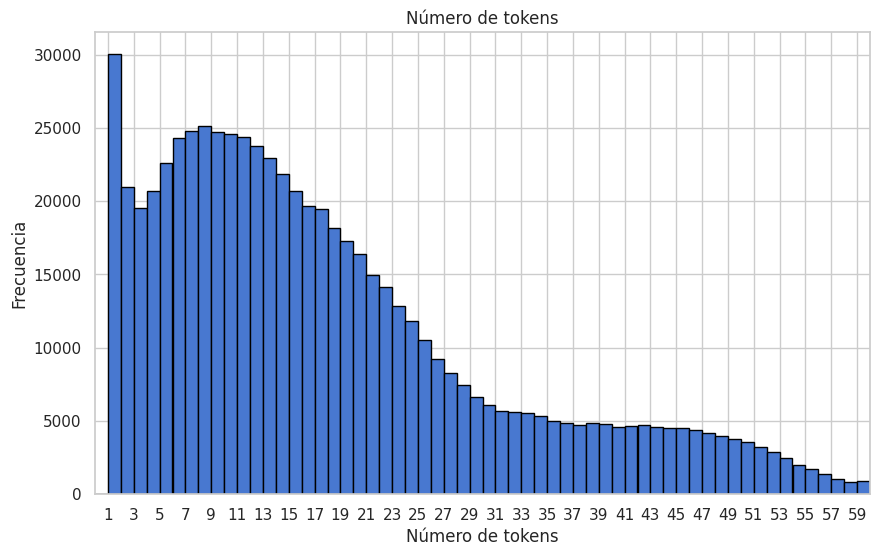

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Rangos en pasos de 1 (de 0 a 60), pero solo números impares
x_ticks = np.arange(1, 61, 2)

# Crear histograma
plt.figure(figsize=(10, 6))
plt.hist(df['tokens'], bins=np.arange(0, 61, 1), edgecolor='black')

# Personalizar el eje X para mostrar solo números impares
plt.xticks(x_ticks)

# Etiquetas y título
plt.title('Número de tokens')
plt.xlabel('Número de tokens')
plt.ylabel('Frecuencia')

plt.xlim(0, 60)  # Limitar el eje X a 0-60

plt.show()

# **3. Emoticonos**

**Añadimos una columna con los posts que tengan emoticonos**






In [ ]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 8.7 MB/s eta 0:00:00


In [ ]:
import emoji

# Función para detectar si un texto contiene emojis
def contiene_emoji(texto):
    for caracter in texto:
        if emoji.is_emoji(caracter):
            return True
    return False

df['emoji'] = df['text'].apply(contiene_emoji)

df.head(10)


,text,author,has_images,reply_to,idioma,characters,tokens,contiene_emoji,emoji
0,yo,jarivi.bsky.social,False,NaN,en,2,1,False,False
1,:(,pawlos.bsky.social,False,at://did:plc:uh3qfh2gozpm3twcoc7gammd/app.bsky...,en,2,1,False,False
2,test,val9000.bsky.social,False,NaN,en,4,1,False,False
3,I posted this 100 years ago!,justanotherenemy.com,False,NaN,en,28,6,False,False
4,Nope,val9000.bsky.social,False,NaN,en,4,1,False,False
5,OH SHIT!!,val9000.bsky.social,False,NaN,en,9,2,False,False
6,lmfao I can't believe this works,val9000.bsky.social,False,NaN,en,32,6,False,False
7,Well... kinda works,val9000.bsky.social,False,at://did:plc:wgmc6qawor67h4tguhzph7gs/app.bsky...,en,19,3,False,False
8,I had to beat an old lady with a stick to get ...,shiboinu.bsky.social,True,NaN,en,66,15,False,False
9,I had to beat an old lady with a stick to get ...,eramdam.bsky.social,True,NaN,en,66,15,False,False


In [ ]:
df[df['emoji'] == True].head(20)

,text,author,has_images,reply_to,idioma,characters,tokens,contiene_emoji,emoji
937,Things just keep getting direr and direr. ☹,transmothra.bsky.social,False,NaN,en,43,8,True,True
9952,'Twas overdetermined. Between Snowtizzy™ One &...,reginawhite.bsky.social,False,NaN,en,111,18,True,True
10673,Drinking a virgin Tang® screwdriver. Sooooo......,transmothra.bsky.social,False,NaN,en,69,10,True,True
11642,♥ #Foobar2000 - best music organization app an...,transmothra.bsky.social,False,NaN,en,72,10,True,True
13066,Skeezy earnest-moustache-man: you totally skee...,transmothra.bsky.social,False,NaN,en,139,20,True,True
13795,@AJMoojenowski The Hoff™ never gets shut down.,hoffspur.bsky.social,False,NaN,en,46,7,True,True
14016,I'm at Reno-Tahoe International Airport (RNO) ...,khadgaprasadoli.bsky.social,False,NaN,en,87,15,True,True
14802,Vote ada obe to 33120 shez a starving child li...,mizmumbojumbo.bsky.social,False,NaN,en,75,14,True,True
14833,Turned geek...obsessed wit all star wars movie...,mizmumbojumbo.bsky.social,False,NaN,en,80,14,True,True
15480,"""@P_U_R_R: Hani nd @Spice_luvin jst left my ho...",mizmumbojumbo.bsky.social,False,NaN,en,123,21,True,True


In [ ]:
count_true = df[df['emoji'] == True].shape[0]

print(count_true)

71797


# **4. Autores**

In [ ]:
authors = df['author'].nunique()

print(f"Número de autores: {authors}")

Número de autores: 178779


In [ ]:
# Contar las veces que aparece cada autor en la columna 'authors'
author_counts = df['author'].value_counts()

# Filtrar los autores que aparecen solo una vez
authors_once = author_counts[author_counts == 1]

# Obtener el número de autores que aparecen solo una vez
num_authors_once = authors_once.count()

print(f"Cantidad de autores que aparecen solo una vez: {num_authors_once}")

Cantidad de autores que aparecen solo una vez: 114107


In [ ]:
# Contar las veces que aparece cada autor en la columna 'authors'
author_counts = df['author'].value_counts()

# El autor que más veces aparece
most_repeated_author = author_counts.idxmax()

# El número de veces que aparece
most_repeated_count = author_counts.max()

print(f"El autor que más se repite es: {most_repeated_author}")
print(f"Con un total de {most_repeated_count} repeticiones.")


El autor que más se repite es: angryredpanda.bsky.social
Con un total de 8003 repeticiones.


In [ ]:
# Contar cuántos posts tiene cada autor
posts_per_author = df['author'].value_counts()

# Calcular la media de posts por autor
mean_posts_per_author = posts_per_author.mean()

# Calcular la mediana de posts por autor
median_posts_per_author = posts_per_author.median()

print(f"La media de posts por autor es: {mean_posts_per_author}")
print(f"La mediana de posts por autor es: {median_posts_per_author}")

La media de posts por autor es: 3.665173202669217
La mediana de posts por autor es: 1.0


In [ ]:
# Contar cuántos posts tiene cada autor
posts_per_author = df['author'].value_counts()

# Obtener los 20 autores con más posts
top_20_authors = posts_per_author.head(20)

print("Los 20 autores con más posts son:")
print(top_20_authors)

Los 20 autores con más posts son:
author
angryredpanda.bsky.social       8003
transmothra.bsky.social         7674
scott.hanselman.com             4798
e-veal.bsky.social              4299
kootsoop.com                    3741
getcaughtliving.bsky.social     3632
rgo-twit.bsky.social            2922
fernss.bsky.social              2778
db4g.com                        2742
dcawrestling.bsky.social        2622
kelly-wyre.bsky.social          2412
conormolloy.bsky.social         2277
geekwithsoul-old.bsky.social    2167
edyong209.bsky.social           2147
cerbykerby.bsky.social          2000
antkaufman.bsky.social          1555
khadgaprasadoli.bsky.social     1541
aphealthcare.bsky.social        1533
wadds.bsky.social               1473
christletgo.bsky.social         1417
Name: count, dtype: int64


In [ ]:
df[df['author'] == "angryredpanda.bsky.social"]

,text,author,has_images,reply_to,idioma,characters,tokens
58441,Tell Governor Rick Scott to Free Marissa Alexa...,angryredpanda.bsky.social,False,NaN,en,91,9
58452,I dreamt about #OscarGrant's face all night...,angryredpanda.bsky.social,False,NaN,en,46,7
58456,"""It comes as a great a shock that the country,...",angryredpanda.bsky.social,False,NaN,en,129,22
58457,LOL. Twitter missing NOTHING.,angryredpanda.bsky.social,False,NaN,en,29,4
58460,"""Maybe people like Chris Matthews won't have t...",angryredpanda.bsky.social,False,NaN,en,139,24
...,...,...,...,...,...,...,...
225439,Where do you expect us to go when the bombs fa...,angryredpanda.bsky.social,False,NaN,en,98,14
231657,so soothing#np\n\nyoutube.com/watch?v=MbIFP9…,angryredpanda.bsky.social,False,NaN,en,43,3
231668,Yea... I do not feel like reliving traumatic/s...,angryredpanda.bsky.social,False,NaN,en,60,9
231843,"""If they wanted to they would..."" and it could...",angryredpanda.bsky.social,False,NaN,en,190,33


In [ ]:
# Contar cuántas veces ha publicado cada autor
conteo_autores = df['author'].value_counts()

# Contar frecuencias por autor
conteo_frecuencias = conteo_autores.value_counts().sort_index()

# Filtrar para quedarnos solo con los que publicaron entre 1 y 10 veces
conteo_1_a_10 = conteo_frecuencias.loc[1:10]

# Calcular porcentaje respecto al total de autores únicos
porcentajes = (conteo_1_a_10 / len(conteo_autores)) * 100

print(porcentajes)

count
1     63.825729
2     17.507649
3      7.253648
4      3.728066
5      2.176430
6      1.311116
7      0.954251
8      0.618082
9      0.474888
10     0.349594
Name: count, dtype: float64


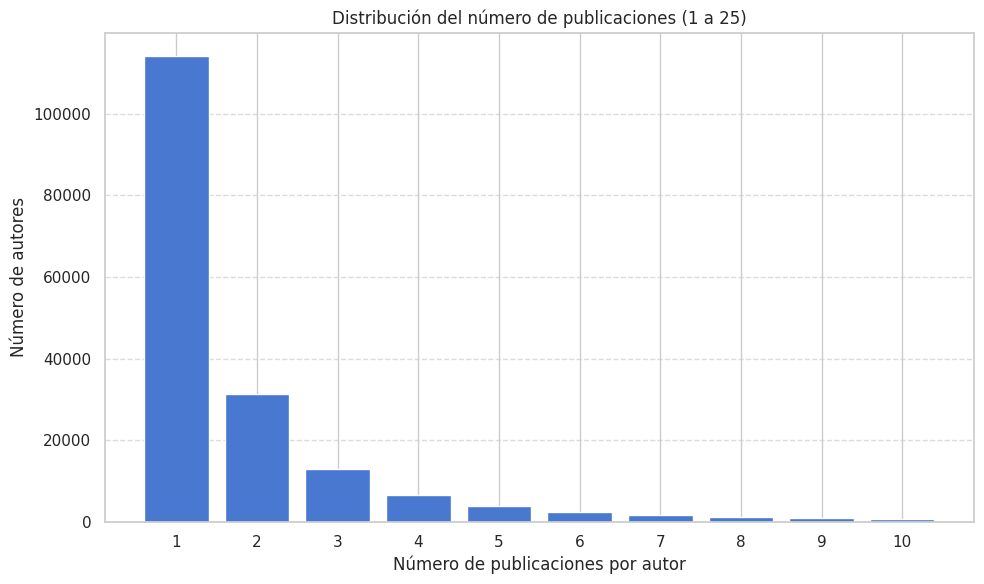

In [ ]:
# 1. Contar cuántas publicaciones tiene cada autor
author_counts = df['author'].value_counts()

# 2. Contar frecuencias por autor
publication_distribution = author_counts.value_counts().sort_index()

# 3. Filtrar para mostrar solo de 1 a 10 publicaciones
filtered_distribution = publication_distribution.loc[1:10]

plt.figure(figsize=(10, 6))
plt.bar(filtered_distribution.index, filtered_distribution.values)
plt.xlabel('Número de publicaciones')
plt.ylabel('Número de autores')
plt.title('Distribución del número de publicaciones por autor')
plt.xticks(range(1, 11))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **5. Imágenes**

In [ ]:
# Filtramos y contamos las filas donde la columna 'has_images' es True
count_true = df[df['has_images'] == True].shape[0]

print(count_true)


102011


In [ ]:
# Filtramos y contamos las filas donde la columna 'has_images' es False
count_false = df[df['has_images'] == False].shape[0]

print(count_false)


553245


# **6. Respuestas**

¿Cuántos posts son respuestas?

In [ ]:
none_count = df['reply_to'].isna().sum()

# Contar cuántas filas tienen otro valor
other_count = df['reply_to'].notna().sum()

print(f"Filas con None en 'reply_to': {none_count}")
print(f"Filas con otro valor en 'reply_to': {other_count}")

Filas con None en 'reply_to': 413679
Filas con otro valor en 'reply_to': 241577
